In [12]:
import json
import jiwer as ji
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DeepSpeech (with optimised alpha beta)

In [31]:
deepspeech_train = pd.DataFrame()
deepspeech_dev = pd.DataFrame()
deepspeech_test = pd.DataFrame()

In [32]:
with open('deepspeech_train.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_train = pd.DataFrame.from_dict(loaded_json)

with open('deepspeech_dev.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_dev = pd.DataFrame.from_dict(loaded_json)
    
with open('deepspeech_test.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_test = pd.DataFrame.from_dict(loaded_json)    

In [33]:
def replacePath(x):
    return x.split("/media/data/LTLab.lan/agarwal/german-speech-corpus/swiss_german/splits_mathias/clips/")[1]

deepspeech_train['wav_filename'] = deepspeech_train['wav_filename'].apply(replacePath)
deepspeech_dev['wav_filename'] = deepspeech_dev['wav_filename'].apply(replacePath)
deepspeech_test['wav_filename'] = deepspeech_test['wav_filename'].apply(replacePath)

In [34]:
deepspeech_train['length_ratio'] = deepspeech_train['res'].str.len()/deepspeech_train['src'].str.len()
deepspeech_dev['length_ratio'] = deepspeech_dev['res'].str.len()/deepspeech_dev['src'].str.len()
deepspeech_test['length_ratio'] = deepspeech_test['res'].str.len()/deepspeech_test['src'].str.len()

**Length Graph**

**Train**

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Length Ratio')]

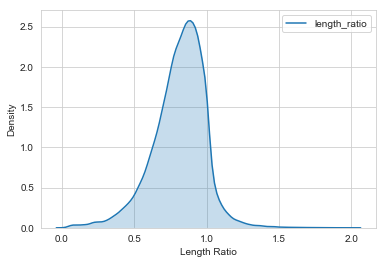

In [35]:
ax = sns.kdeplot(deepspeech_train['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

**Dev+Train**

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Length Ratio')]

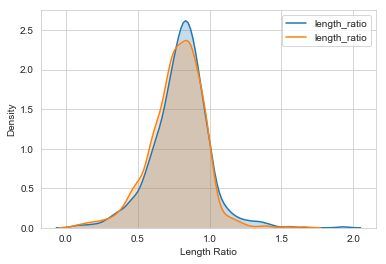

In [36]:
ax = sns.kdeplot(deepspeech_dev['length_ratio'], shade=True)
sns.kdeplot(deepspeech_test['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

**WER Train**

In [38]:
deepspeech_train_no_issue = deepspeech_train[deepspeech_train['length_ratio'] > 0.75]

In [39]:
print("Issue:", round(deepspeech_train['wer'].mean()*100,2))
print("No Issue:", round(deepspeech_train_no_issue['wer'].mean()*100,2))

Issue: 53.82
No Issue: 46.26


**WER Dev**

In [40]:
deepspeech_dev_no_issue = deepspeech_dev[deepspeech_dev['length_ratio'] > 0.75]

In [41]:
print("Issue:", round(deepspeech_dev['wer'].mean()*100,2))
print("No Issue:", round(deepspeech_dev_no_issue['wer'].mean()*100,2))

Issue: 57.86
No Issue: 51.0


**WER Test**

In [43]:
deepspeech_test_no_issue = deepspeech_test[deepspeech_test['length_ratio'] > 0.75]

In [44]:
print("Issue:", round(deepspeech_test['wer'].mean()*100,2))
print("No Issue:", round(deepspeech_test_no_issue['wer'].mean()*100,2))

Issue: 59.68
No Issue: 51.18


# Jasper

In [7]:
jasper_train = pd.DataFrame()
jasper_dev = pd.DataFrame()
jasper_test = pd.DataFrame()

jasper = pd.DataFrame(columns = ['train', 'dev','test'])

In [6]:
data = []
with open('jasper_train.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_train[deepspeech_train['wav_filename'].str.match(wav_filename+'.wav')]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_train = pd.DataFrame(data = data, columns = ['wav_filename', 'res', 'src', 'wer', 'length_ratio'])

30492
30461


In [9]:
data = []
with open('jasper_dev.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_dev[deepspeech_dev['wav_filename'].str.match(wav_filename+'.wav')]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_dev = pd.DataFrame(data = data, columns = ['wav_filename', 'res', 'src', 'wer', 'length_ratio'])

25673
31921
6736
16961
23297
26886
32640
15283
15887
16978
22522
12508
6732
9743


In [10]:
data = []
with open('jasper_test.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_test[deepspeech_test['wav_filename'].str.match(wav_filename+'.wav')]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_test = pd.DataFrame(data = data, columns = ['wav_filename', 'res', 'src', 'wer', 'length_ratio'])

29472
3319
30907
381
1526
17699
23046
10994
29547
14885
22438
29979
13995
21704
19806
29470


**Length Graph**

**Train**

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Length Ratio')]

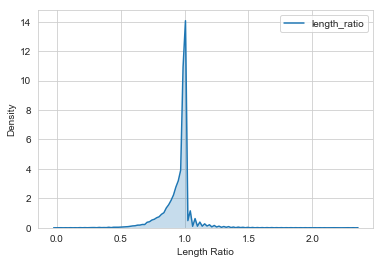

In [23]:
ax = sns.kdeplot(jasper_train['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

**Dev+Test**

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Length Ratio')]

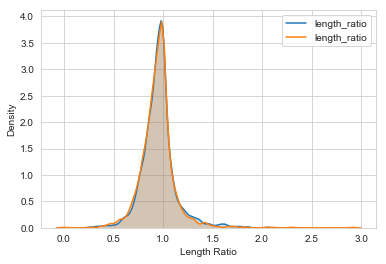

In [24]:
ax = sns.kdeplot(jasper_dev['length_ratio'], shade=True)
sns.kdeplot(jasper_test['length_ratio'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

**WER Train**

In [46]:
jasper_train_no_issue = jasper_train[jasper_train['length_ratio'] > 0.75]

In [47]:
print("Issue:", round(jasper_train['wer'].mean()*100,2))
print("No Issue:", round(jasper_train_no_issue['wer'].mean()*100,2))

Issue: 15.88
No Issue: 13.27


**WER Dev**

In [48]:
jasper_dev_no_issue = jasper_dev[jasper_dev['length_ratio'] > 0.75]

In [49]:
print("Issue:", round(jasper_dev['wer'].mean()*100,2))
print("No Issue:", round(jasper_dev_no_issue['wer'].mean()*100,2))

Issue: 41.3
No Issue: 39.66


**WER Test**

In [50]:
jasper_test_no_issue = jasper_test[jasper_test['length_ratio'] > 0.75]

In [51]:
print("Issue:", round(jasper_test['wer'].mean()*100,2))
print("No Issue:", round(jasper_test_no_issue['wer'].mean()*100,2))

Issue: 43.97
No Issue: 41.85
